In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Date stuff
from datetime import datetime
from datetime import timedelta
'''
Como esse código é um exercício voltado à
utilização de modelos de maschine learning,
a parte de tratamento dos dadose e parâmetros
que entariam para treinar a rede acabei 
pegando do próprio código do Wall-Mart. 
Resolvi tirar alguns parâmetros que não
sabia se realmente seriam relevantes para o
modelo, tais como: 
LaggedSales
Sales_dif
LaggedAvailable
foram removidos do modelo para treinamento da
malha.
'''

'\nComo esse código é um exercício voltado à\nutilização de modelos de maschine learning,\na parte de tratamento dos dadose e parâmetros\nque entariam para treinar a rede acabei \npegando do próprio código do Wall-Mart. \nResolvi tirar alguns parâmetros que não\nsabia se realmente seriam relevantes para o\nmodelo, tais como: \nLaggedSales\nSales_dif\nLaggedAvailable\nforam removidos do modelo para treinamento da\nmalha.\n'

Função mergeData faz o comando merge das planilhas:
teste/features/stores
train/features/stores

In [2]:
def mergeData(df):
    features =pd.read_csv('features.csv')
    storesdata =pd.read_csv('stores.csv')
    df = pd.merge(df, features, on=['Store','Date','IsHoliday'],
                  how='inner')
    df = pd.merge(df, storesdata, on=['Store'],
                  how='inner')
    return df

Primeiramente é necessário levantar os dados de treino

In [3]:
# Pick data from train.csv
train = mergeData(pd.read_csv('train.csv'))
train['Split'] = 'Train'
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Train
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Train
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Train
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Train
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Train


Em seguida, a leitura dos dados de teste

In [4]:
# Pick data from test.csv
test = mergeData(pd.read_csv('test.csv'))
test['Split'] = 'Test'
test.tail()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,Test
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,Test
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,Test
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,Test
115063,45,98,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,Test


Vamos concatenar os dados de treinos e de teste

In [5]:
df = pd.concat([train,test],axis=0, sort = True, ignore_index=True) # Join train and test
df.tail()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Split,Store,Temperature,Type,Unemployment,Weekly_Sales
536629,NaN,2013-07-26,93,3.804,False,212.02,851.73,2.06,10.88,1864.57,118221,Test,45,76.06,B,NaN,NaN
536630,NaN,2013-07-26,94,3.804,False,212.02,851.73,2.06,10.88,1864.57,118221,Test,45,76.06,B,NaN,NaN
536631,NaN,2013-07-26,95,3.804,False,212.02,851.73,2.06,10.88,1864.57,118221,Test,45,76.06,B,NaN,NaN
536632,NaN,2013-07-26,97,3.804,False,212.02,851.73,2.06,10.88,1864.57,118221,Test,45,76.06,B,NaN,NaN
536633,NaN,2013-07-26,98,3.804,False,212.02,851.73,2.06,10.88,1864.57,118221,Test,45,76.06,B,NaN,NaN


# Algumas análises dos dados

In [6]:
df.describe()

,CPI,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales
count,498472.000000,536634.000000,536634.000000,265596.000000,197685.000000,242326.000000,237143.000000,266496.000000,536634.000000,536634.000000,536634.000000,498472.000000,421570.000000
mean,172.090481,44.277301,3.408310,7438.004144,3509.274827,1857.913525,3371.556866,4324.021158,136678.550960,22.208621,58.771762,7.791888,15981.258123
std,39.542149,30.527358,0.430861,9411.341379,8992.047197,11616.143274,6872.281734,13549.262124,61007.711799,12.790580,18.678716,1.865076,22711.183519
min,126.064000,1.000000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,34875.000000,1.000000,-7.290000,3.684000,-4988.940000
25%,132.521867,18.000000,3.041000,2114.640000,72.500000,7.220000,336.240000,1570.112500,93638.000000,11.000000,45.250000,6.623000,2079.650000
50%,182.442420,37.000000,3.523000,5126.540000,385.310000,40.760000,1239.040000,2870.910000,140167.000000,22.000000,60.060000,7.795000,7612.030000
75%,213.748126,74.000000,3.744000,9303.850000,2392.390000,174.260000,3397.080000,5012.220000,202505.000000,33.000000,73.230000,8.549000,20205.852500
max,228.976456,99.000000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,219622.000000,45.000000,101.950000,14.313000,693099.360000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 17 columns):
CPI             498472 non-null float64
Date            536634 non-null object
Dept            536634 non-null int64
Fuel_Price      536634 non-null float64
IsHoliday       536634 non-null bool
MarkDown1       265596 non-null float64
MarkDown2       197685 non-null float64
MarkDown3       242326 non-null float64
MarkDown4       237143 non-null float64
MarkDown5       266496 non-null float64
Size            536634 non-null int64
Split           536634 non-null object
Store           536634 non-null int64
Temperature     536634 non-null float64
Type            536634 non-null object
Unemployment    498472 non-null float64
Weekly_Sales    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(3)
memory usage: 66.0+ MB


Primeiramente assim como feito em Cracking the Walmart Sales Forecasting challenge, fez-se a conversão para graus celsius


Vou adicionar aqui a parte do código do WallMart Forecasting
onde ele mostra o gráfico de correlação, abordagem essa que
achei muito interessante e que na primeira entrega nem havia
passado pela minha cabeça

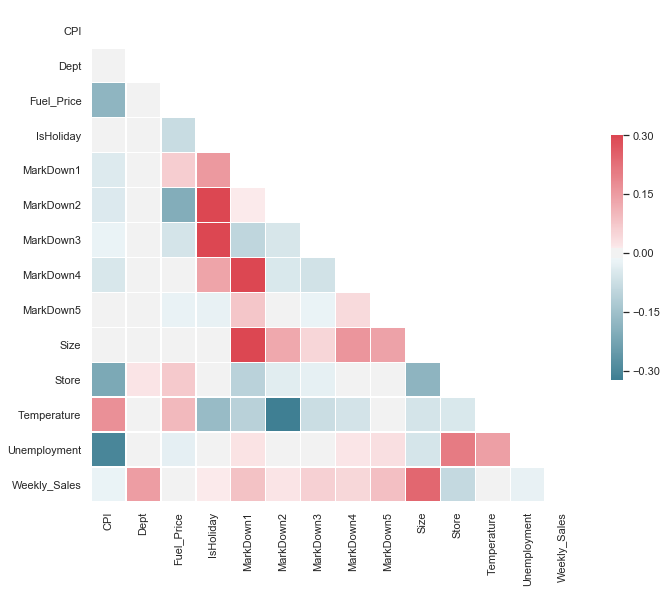

In [8]:
# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Dentre as análises faltantes em relação à primeira análise é que fica claro que o tamanho da loja está muito correlacionada com as vendas semanais

In [9]:
df['Temperature'] = (df['Temperature'] - 32) * 5/9

# Resolvendo Problemas de NaN

In [10]:
df.isnull().sum()

CPI              38162
Date                 0
Dept                 0
Fuel_Price           0
IsHoliday            0
MarkDown1       271038
MarkDown2       338949
MarkDown3       294308
MarkDown4       299491
MarkDown5       270138
Size                 0
Split                0
Store                0
Temperature          0
Type                 0
Unemployment     38162
Weekly_Sales    115064
dtype: int64

In [11]:
df.fillna(0, inplace=True)
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Split,Store,Temperature,Type,Unemployment,Weekly_Sales
0,211.096358,2010-02-05,1,2.572,False,0.0,0.0,0.0,0.0,0.0,151315,Train,1,5.727778,A,8.106,24924.50
1,211.096358,2010-02-05,2,2.572,False,0.0,0.0,0.0,0.0,0.0,151315,Train,1,5.727778,A,8.106,50605.27
2,211.096358,2010-02-05,3,2.572,False,0.0,0.0,0.0,0.0,0.0,151315,Train,1,5.727778,A,8.106,13740.12
3,211.096358,2010-02-05,4,2.572,False,0.0,0.0,0.0,0.0,0.0,151315,Train,1,5.727778,A,8.106,39954.04
4,211.096358,2010-02-05,5,2.572,False,0.0,0.0,0.0,0.0,0.0,151315,Train,1,5.727778,A,8.106,32229.38


In [12]:
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [13]:
type_dummies = pd.get_dummies(df['Type'])
store_dummies = pd.get_dummies(df['Store'])
dept_dummies = pd.get_dummies(df['Dept'])
holiday_dummies = pd.get_dummies(df['IsHoliday'])
type_dummies.head()

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [14]:
df['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df['Date'].astype(str).values.tolist()]
df['Month'] = [date.month for date in df['DateType']]
Month_dummies = pd.get_dummies(df['Month'] )
Month_dummies

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0


Para dias como Black Friday e Natal Adicionar no vetor

In [15]:
df['Black_Friday'] = np.where((df['DateType']==datetime(2010, 11, 26).date()) | (df['DateType']==datetime(2011, 11, 25).date()), 'yes', 'no')
df['Pre_christmas'] = np.where((df['DateType']==datetime(2010, 12, 23).date()) | (df['DateType']==datetime(2010, 12, 24).date()) | (df['DateType']==datetime(2011, 12, 23).date()) | (df['DateType']==datetime(2011, 12, 24).date()), 'yes', 'no')
df['Black_Friday'] = 'Black_Friday_' + df['Black_Friday'].map(str)
df['Pre_christmas'] = 'Pre_christmas_' + df['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(df['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df['Pre_christmas'] )
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Split,Store,Temperature,Type,Unemployment,Weekly_Sales,DateType,Month,Black_Friday,Pre_christmas
0,211.096358,2010-02-05,1,2.572,False,0.0,0.0,0.0,0.0,0.0,...,Train,1,5.727778,A,8.106,24924.50,2010-02-05,2,Black_Friday_no,Pre_christmas_no
1,211.096358,2010-02-05,2,2.572,False,0.0,0.0,0.0,0.0,0.0,...,Train,1,5.727778,A,8.106,50605.27,2010-02-05,2,Black_Friday_no,Pre_christmas_no
2,211.096358,2010-02-05,3,2.572,False,0.0,0.0,0.0,0.0,0.0,...,Train,1,5.727778,A,8.106,13740.12,2010-02-05,2,Black_Friday_no,Pre_christmas_no
3,211.096358,2010-02-05,4,2.572,False,0.0,0.0,0.0,0.0,0.0,...,Train,1,5.727778,A,8.106,39954.04,2010-02-05,2,Black_Friday_no,Pre_christmas_no
4,211.096358,2010-02-05,5,2.572,False,0.0,0.0,0.0,0.0,0.0,...,Train,1,5.727778,A,8.106,32229.38,2010-02-05,2,Black_Friday_no,Pre_christmas_no


In [20]:
df = pd.concat([df,Pre_christmas_dummies,Black_Friday_dummies],axis=1)
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday,Pre_christmas,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes
0,211.096358,2010-02-05,1,2.572,False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
1,211.096358,2010-02-05,2,2.572,False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
2,211.096358,2010-02-05,3,2.572,False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
3,211.096358,2010-02-05,4,2.572,False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
4,211.096358,2010-02-05,5,2.572,False,0.0,0.0,0.0,0.0,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0


In [36]:
selector = [
    #'Month',
    'CPI',
    'Fuel_Price',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5',
    'Size',
    'Temperature',
    'Unemployment',
        
    'Pre_christmas_no',
    'Pre_christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    

]

In [43]:
train

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday,Pre_christmas,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes
0,211.096358,2010-02-05,1,2.572,False,0.00,0.00,0.0,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
1,211.096358,2010-02-05,2,2.572,False,0.00,0.00,0.0,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
2,211.096358,2010-02-05,3,2.572,False,0.00,0.00,0.0,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
3,211.096358,2010-02-05,4,2.572,False,0.00,0.00,0.0,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
4,211.096358,2010-02-05,5,2.572,False,0.00,0.00,0.0,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
5,211.096358,2010-02-05,6,2.572,False,0.00,0.00,0.0,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
6,211.096358,2010-02-05,7,2.572,False,0.00,0.00,0.0,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
7,211.096358,2010-02-05,8,2.572,False,0.00,0.00,0.0,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
8,211.096358,2010-02-05,9,2.572,False,0.00,0.00,0.0,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0
9,211.096358,2010-02-05,10,2.572,False,0.00,0.00,0.0,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,1,0


In [110]:
from sklearn.model_selection import train_test_split
# Set seed for reproducability 
train = df.loc[df['Split']=='Train']
test = df.loc[df['Split']=='Test']
np.random.seed(42)
X_train, X_dev, y_train, y_dev = train_test_split(train[selector], train['Weekly_Sales'],  test_size=0.2, random_state=42)
print(y_train.shape)
print(y_dev.shape)

(337256,)
(84314,)


In [109]:
from sklearn.ensemble import RandomForestRegressor
#Random forest model specification
regr = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
regr.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   44.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [111]:
y_pred_random = regr.predict(X_dev)
y_dev = y_dev.to_frame()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.7s finished


In [118]:
y_dev['Predicted'] = y_pred_random
y_dev.head()

,Weekly_Sales,Predicted
272342,21577.44,16698.809022
176581,8370.28,17947.851082
354212,4985.05,7431.222593
281444,10512.26,7812.830838
124208,40924.39,24730.873735


In [104]:
y_pred = pd.DataFrame(y_pred_random)
y_pred.columns = ['Predicao']

In [106]:
pd.concat([y_dev, y_pred], axis = 1)

,Weekly_Sales,Predicao
0,NaN,16353.982764
1,NaN,18570.568688
2,13740.12,7382.431937
3,NaN,7437.779090
4,NaN,26272.615688
5,NaN,22509.148691
6,NaN,16135.032989
7,40129.01,23944.331601
8,NaN,20908.016464
9,NaN,14039.534454


,Weekly_Sales
272342,21577.4
176581,8370.28
354212,4985.05
281444,10512.3
124208,40924.4
123901,29543.5
111563,7083.59
93836,57616.2
102266,709.5
254986,420.17


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_dev,y_dev)